# SSUSI Observation Example

This notebook gives an example of how to use the ssusi file to get FUV observations from a particular SSUSI SDR file. 

In [ ]:
dmsp = 16
hemisphere = 'S'
radiance_type = 'LBHL'
ssusi_file = b'/home/matsuo/Documents/tomokostuff/SSUSISDR/20140217/dmspf16_ssusi_sdr-disk_2014048T101845-2014048T120036-REV53322_vA8.2.0r000.nc'

In [2]:
from LBH_to_eflux.observations.ssusi import SDRPass
import datetime
import os
import numpy as np
from geospacepy.special_datetime import (doyarr2datetime,
                                        datetimearr2jd,
                                        datetime2jd,
                                        jd2datetime,
                                        datetime2doy,
                                        jdarr2datetime)

import matplotlib.pyplot as plt
from geospacepy.satplottools import draw_dialplot
from matplotlib.gridspec import GridSpec


Run all four cases of SDR reading
1. Raw SDR file
2. SDR file with solar influence removal
3. SDR file with spatial binning of observations
4. SDR file with solar influence rmeoval and spatial binning

In [3]:
ssusi_obs = SDRPass(ssusi_file,dmsp,hemisphere,radiance_type = radiance_type, noise_removal = False, spatial_bin = False)
ssusi_obs_no_noise = SDRPass(ssusi_file,dmsp,hemisphere,radiance_type = radiance_type, noise_removal = True, spatial_bin = False)
ssusi_obs_binned = SDRPass(ssusi_file,dmsp,hemisphere,radiance_type = radiance_type, noise_removal = False, spatial_bin = True )
ssusi_obs_binned_no_noise = SDRPass(ssusi_file,dmsp,hemisphere,radiance_type = radiance_type, noise_removal = True, spatial_bin = True)

Setting Apex epoch for 20140217 to 2014.131506849315
Setting Apex epoch for 20140217 to 2014.131506849315
Setting Apex epoch for 20140217 to 2014.131506849315
Setting Apex epoch for 20140217 to 2014.131506849315


###  To retrieve observation values, locations, and times from one particular hemispheric polar pass, call the function get_ingest_data()

In [4]:
startdt = jd2datetime(np.nanmin(ssusi_obs['jds']))
enddt = jd2datetime(np.nanmax(ssusi_obs['jds']))
lats,lons,obs,y_var,jds = ssusi_obs.get_ingest_data()
median_time_for_hemi_pass = np.nanmedian(jds)

# Plots

/home/matsuo/amgeo_dev/LBH_to_eflux/LBH_to_eflux/observations/ssusi.py:546: RuntimeWarning: invalid value encountered in greater_equal
  inrange = np.logical_and(self['jds'].flatten()>=startjd,
/home/matsuo/amgeo_dev/LBH_to_eflux/LBH_to_eflux/observations/ssusi.py:547: RuntimeWarning: invalid value encountered in less
  self['jds'].flatten()<endjd)


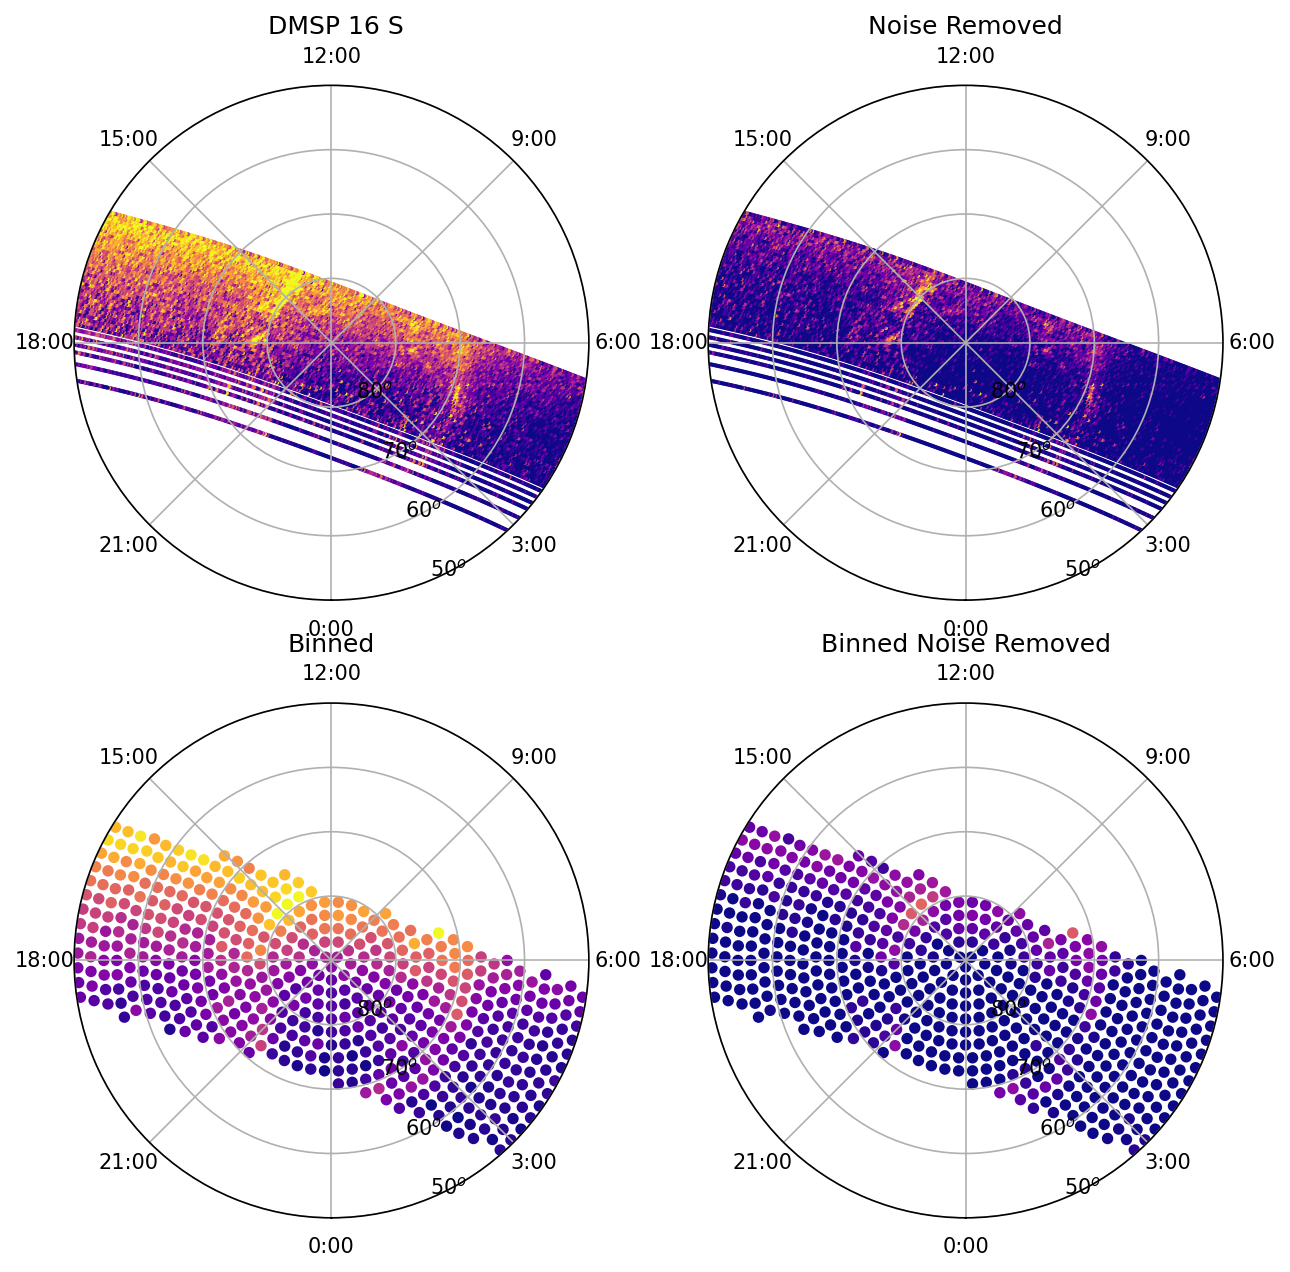

In [5]:
%matplotlib inline

f = plt.figure(figsize=(10,10),dpi=150)

potkwargs = {'s' : 1,'cmap':'plasma','vmin':0,'vmax': 0.7}

startdt = jd2datetime(np.nanmin(ssusi_obs['jds']))
enddt = jd2datetime(np.nanmax(ssusi_obs['jds']))
dt = datetime.datetime(startdt.year, startdt.month, startdt.day)
ax_1 = f.add_subplot(221, projection = 'polar')
ssusi_obs.plot_obs(ax_1, **potkwargs)
ax_1.set_title(' DMSP {} {}'.format(dmsp, hemisphere))

ax_2 = f.add_subplot(222, projection = 'polar')
ssusi_obs_no_noise.plot_obs(ax_2, **potkwargs)
ax_2.set_title('Noise Removed'.format(dmsp, hemisphere))

potkwargs = {'s':20,'cmap':'plasma','vmin':0,'vmax': 0.7}

ax_3 = f.add_subplot(223, projection = 'polar')
ssusi_obs_binned.plot_obs(ax_3, **potkwargs)
ax_3.set_title('Binned'.format(dmsp, hemisphere))

startdt = jd2datetime(np.nanmin(ssusi_obs_binned_no_noise['jds']))
enddt = jd2datetime(np.nanmax(ssusi_obs_binned_no_noise['jds']))
dt = datetime.datetime(startdt.year, startdt.month, startdt.day)

ax_4 = f.add_subplot(224, projection = 'polar')
ssusi_obs_binned_no_noise.plot_obs(ax_4, **potkwargs)
ax_4.set_title('Binned Noise Removed'.format(dmsp, hemisphere))
plt.show()